In [2]:
import csv
import matplotlib.pyplot as plt
import numpy as np
import math



In [3]:
def predict(mu1, var1, mu2, var2):
    var = var1 + var2
    mu = mu1 + mu2
    return mu, var

#def update(mu1, var1, mu2, var2):
#    var = 1 / (1 / var1 + 1 / var2)
#    mu = (mu1 * var2 + mu2 * var1) / (var1 + var2)
#    return mu, var

def update(mu1,var1,mu2,var2):
    k=var1/(var1+var2)
    var = k*var2
    mu = mu1*(1-k) + mu2*k
    
    return mu, var

def printg(t1,t,t2,time_GPS,correction,speed_GPS,speed_OBD):
    f=plt.figure(font)
    f.set_figwidth(40)
    f.set_figheight(5)
    plt.plot([i for i in range(len(time_GPS))][t1:t:t2], correction[t1//t2:t//t2:], label='kalman', c='b',linewidth = 5)
    plt.plot([i for i in range(len(time_GPS))][t1:t:t2], speed_OBD[t1:t:t2], label='OBD', c='r', linewidth = 3)
    plt.plot([i for i in range(len(time_GPS))][t1:t:t2], speed_GPS[t1:t:t2], label='GPS', c='g', linewidth = 3)
    plt.legend(fontsize = 18)

def Gaussian(x, mu, sigma2):
    return 1 / math.sqrt(2 * math.pi * sigma2) * math.exp(-0.5 * (x - mu)**2 / sigma2)

def plotG(mu, sigma, *args):
    X = np.linspace(mu - 5 * sigma, mu + 5 * sigma, 101)
    Y = [Gaussian(x, mu=mu, sigma2 = sigma**2) for x in X]
    plt.plot(X, Y, *args)
    plt.grid()

# Фильтр Калмана на чистых данных

In [4]:
time_OBD =[]
speed_OBD = []
time_GPS = []
speed_GPS = []  

c=0

with open('data1.csv', 'r') as csvfile:
    csvreader = csv.reader(csvfile)
    for row in csvreader:
        if c>1:
            if row[16] != '-':
                time_OBD.append(str(row[1])[12:])
                speed_OBD.append(float(row[13]))
                time_GPS.append(str(row[0])[11:19])
                speed_GPS.append(float(row[16]))
        c+=1


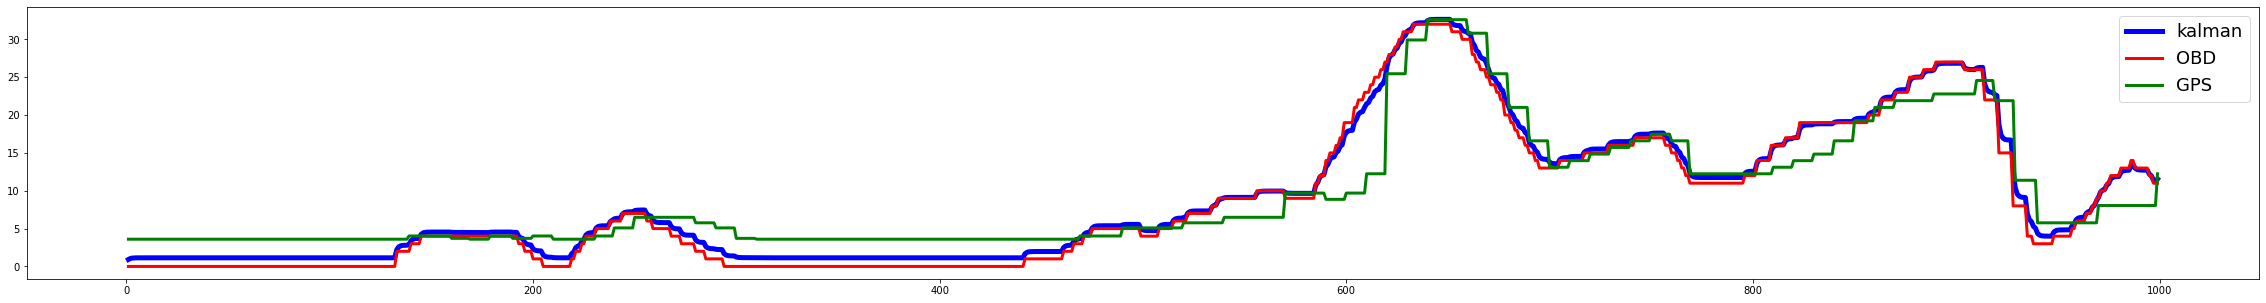

In [5]:
correction =[]

mu, sigma = 0, 80.

ksi_GPS = 10
ksi_OBD = 2

v=1
v_sigma = 2
    
t2 = 1
for t in range(1,len(time_GPS),t2):
    
    mu, sigma = predict(mu, sigma, v, v_sigma)
    
    meas_GPS, meas_OBD = speed_GPS[t-1], speed_OBD[t-1] 
    
    mu2, sigma2 = update(meas_OBD, ksi_OBD, meas_GPS, ksi_GPS)
    
    mu, sigma = update(mu, sigma, mu2, sigma2)
    
    correction.append(mu)

printg(1,1000,t2,time_GPS,correction,speed_GPS,speed_OBD)

# Фильтр Калмана при пропадании данных с GPS

In [7]:
time_OBD =[]
speed_OBD = []
time_GPS = []
speed_GPS = []  

c=0

with open('data1.csv', 'r') as csvfile:
    csvreader = csv.reader(csvfile)
    for row in csvreader:
        if c>1:
            if row[16] != '-':
                time_OBD.append(str(row[1])[12:])
                speed_OBD.append(float(row[13]))
                time_GPS.append(str(row[0])[11:19])
                if row[0][14:16] > '25' and row[0][14:16] < '35':
                    speed_GPS.append(float(0))
                else:
                    speed_GPS.append(float(row[16]))
        c+=1

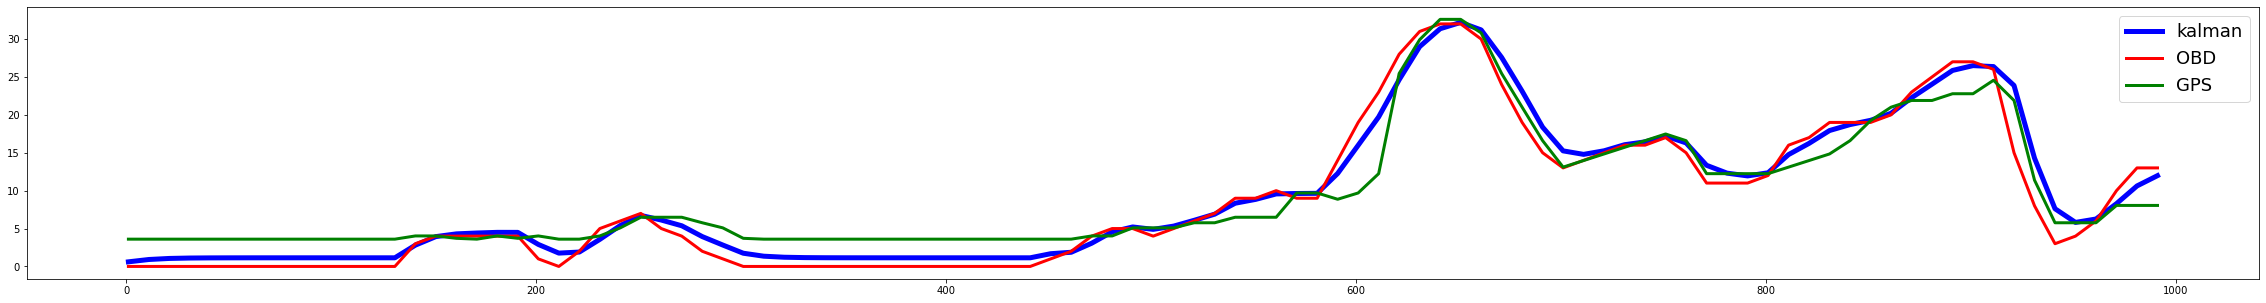

In [8]:
correction =[]

mu, sigma = 0, 80.

ksi_GPS = 10
ksi_OBD = 2

v=1
v_sigma = 2
    
t2 = 10
for t in range(1,len(time_GPS),t2):

    mu, sigma = predict(mu, sigma, v, v_sigma)
    
    meas_GPS = 0 if speed_GPS[t-1] == 0. else speed_GPS[t-1]
    meas_OBD = speed_OBD[t-1]
    
    mu2, sigma2 = update(meas_OBD, ksi_OBD, meas_GPS, ksi_GPS)
    mu, sigma = update(mu, sigma, mu2, sigma2)
    
    correction.append(mu)

printg(1,1000,t2,time_GPS,correction,speed_GPS,speed_OBD)


# Фильтр Калмана при пропадании данных с OBD

In [10]:
time_OBD =[]
speed_OBD = []
time_GPS = []
speed_GPS = []  
c = 0
with open('data1.csv', 'r') as csvfile:
    csvreader = csv.reader(csvfile)
    for row in csvreader:
        if c > 1:
            if row[16] != '-':
                time_OBD.append(str(row[1])[12:])
                time_GPS.append(str(row[0])[11:19])
                speed_GPS.append(float(row[16]))
                if row[1][15:17] > '40' and row[1][15:17] < '50':
                    speed_OBD.append(float(0))
                else:
                    speed_OBD.append(float(row[13]))
        c+=1

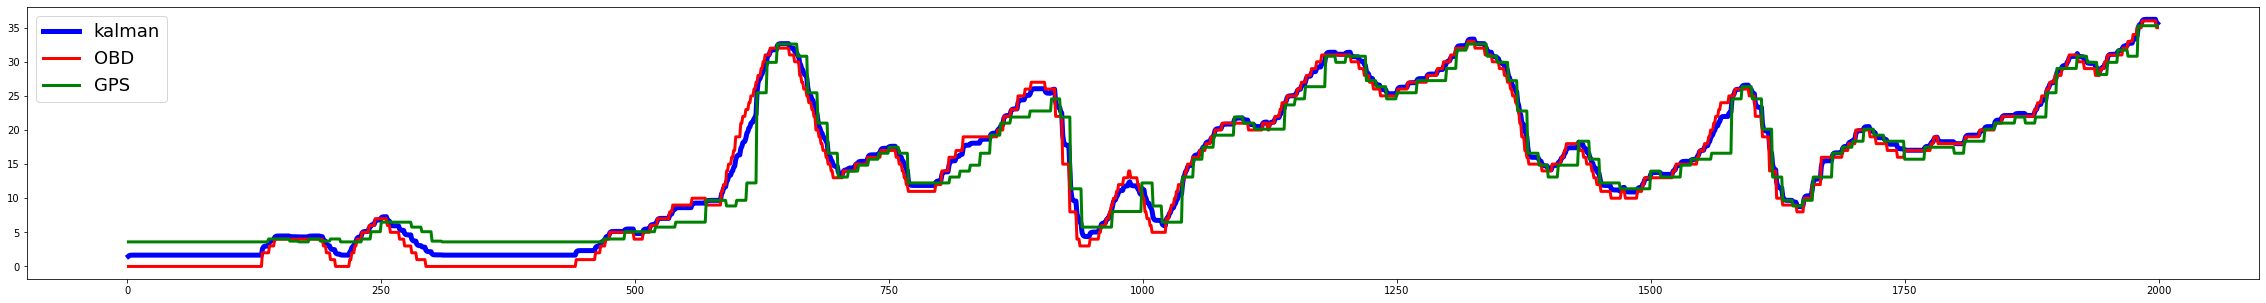

In [11]:
correction =[]

mu, sigma = 0, 80.
 
ksi_GPS = 4.
ksi_OBD = 2.

t2 = 1
for t in range(1,len(time_GPS),t2):
    
    mu, sigma = predict(mu, sigma, v, v_sigma)
    
    meas_GPS = speed_GPS[t-1]
    meas_OBD = 0 if speed_OBD[t-1] == 0. else speed_OBD[t-1]
    
    mu2, sigma2 = update(meas_OBD, ksi_OBD, meas_GPS, ksi_GPS)
    mu, sigma = update(mu, sigma, mu2, sigma2)
    
    correction.append(mu)
    
printg(1,2000,t2,time_GPS,correction,speed_GPS,speed_OBD)